<a href="https://colab.research.google.com/github/RahulArra/Machine-Learning/blob/main/MACHINE_LEARNING_ASSIGNMENT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  BASELINE MODEL –  Research Paper Approach


In [47]:
#  BASELINE MODEL – Reproduction of Research Paper Approach
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# 1️ Load Data
data = pd.read_csv("/content/diabetes (1).csv")

# 2️ Replace 0s with NaN
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_zeros] = data[cols_with_zeros].replace(0, np.nan)



In [48]:
data.info()
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age             

In [49]:

# 3️ Impute missing values
mean_cols = ['Glucose', 'BloodPressure']
median_cols = ['SkinThickness', 'Insulin', 'BMI']
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
data[mean_cols] = imputer_mean.fit_transform(data[mean_cols])
data[median_cols] = imputer_median.fit_transform(data[median_cols])


In [50]:
data.info()
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0


In [51]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


In [52]:

# 4️ Feature Selection (remove low-correlation features)
data = data.drop(['BloodPressure', 'Insulin', 'DiabetesPedigreeFunction'], axis=1)

# 5️ Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [53]:

# 6️ Quantile Transformation (for normalization & outlier handling)
scaler = QuantileTransformer(output_distribution='normal')
X_scaled = scaler.fit_transform(X)

# 7️ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 8️ Define Models (default params, no balancing)
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


In [54]:

# 9️ Train and Evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

baseline_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print("\n--- Baseline Model Performance (Research Paper Style) ---")
print(baseline_df)


--- Baseline Model Performance (Research Paper Style) ---
           Model  Accuracy  Precision    Recall  F1 Score
3        XGBoost  0.753247   0.642857  0.666667  0.654545
0            KNN  0.720779   0.596491  0.629630  0.612613
2  Random Forest  0.714286   0.589286  0.611111  0.600000
1            SVM  0.720779   0.612245  0.555556  0.582524


#Tuned Model :
 IMPROVED MODEL for Diabetes Prediction (with Feature Selection, Balancing, Tuning & Stacking)


In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings

warnings.filterwarnings('ignore')

# 1. Data Loading and Preprocessing
X = data.drop('Outcome', axis=1)
y = data['Outcome']






In [56]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# 2. Train-Test Split
# The data is now balanced after SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# 3. Model Definition and Tuning
knn = KNeighborsClassifier(n_neighbors=7) # Using a common default
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
rf = RandomForestClassifier(random_state=42)


In [58]:
# Hyperparameter tuning for Random Forest
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9, 11, 15, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

# Hyperparameter Tuning for Random Forest
rf_random = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, scoring='f1', cv=5, random_state=42)
rf_random.fit(X_train, y_train)
best_rf = rf_random.best_estimator_

# Define SVM model
svm = SVC(kernel='rbf', random_state=42)

# Train models (tuned or direct)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [62]:
# Define estimators for stacking
estimators = [
    ('knn', knn),
    ('svm', svm),
    ('rf', best_rf),
    ('xgb', xgb)
]
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
stack_model.fit(X_train, y_train)

# Evaluate all tuned models
models_to_evaluate = {
    'KNN': knn,
    'SVM': svm,
    'Random Forest': best_rf,
    'XGBoost': xgb,
    'Stacking Model': stack_model
}


In [65]:
# Calculate metrics for each model
summary_list = []
for name, model in models_to_evaluate.items():
    # Fit the standard models here as they were not fitted in the tuned section
    if 'Standard' in name:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    summary_list.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    })

# Create and display the DataFrame
tuned_summary_df = pd.DataFrame(summary_list).sort_values(by='F1', ascending=False)
print("--- Model Performance Summary ---")
print(tuned_summary_df)

--- Model Performance Summary ---
            Model  Accuracy  Precision  Recall        F1
3         XGBoost     0.830   0.794643    0.89  0.839623
0             KNN     0.810   0.758333    0.91  0.827273
4  Stacking Model     0.805   0.760684    0.89  0.820276
1             SVM     0.785   0.739496    0.88  0.803653
2   Random Forest     0.785   0.752212    0.85  0.798122



--- Combined Model Comparison ---
            Model  Accuracy  Precision    Recall        F1   Version
0         XGBoost  0.753247   0.642857  0.666667  0.654545  Baseline
1             KNN  0.720779   0.596491  0.629630  0.612613  Baseline
2   Random Forest  0.714286   0.589286  0.611111  0.600000  Baseline
3             SVM  0.720779   0.612245  0.555556  0.582524  Baseline
4         XGBoost  0.830000   0.794643  0.890000  0.839623  Improved
5             KNN  0.810000   0.758333  0.910000  0.827273  Improved
6  Stacking Model  0.805000   0.760684  0.890000  0.820276  Improved
7             SVM  0.785000   0.739496  0.880000  0.803653  Improved
8   Random Forest  0.785000   0.752212  0.850000  0.798122  Improved


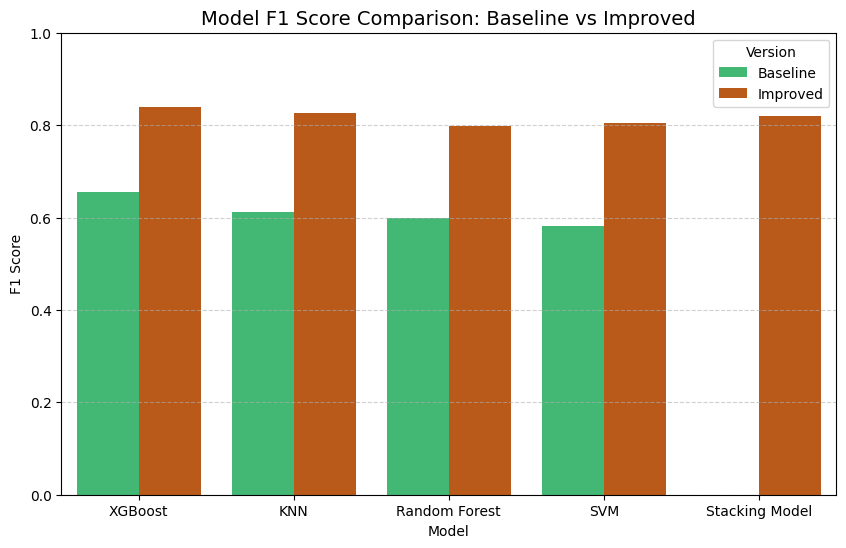

In [64]:
#  Ensure consistent column names for both DataFrames
if 'Version' in tuned_summary_df.columns:
    tuned_summary_df = tuned_summary_df.drop('Version', axis=1)
if 'Version' in baseline_df.columns:
    baseline_df = baseline_df.drop('Version', axis=1)

baseline_df.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1']
tuned_summary_df.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1']


#  Add version labels
baseline_df['Version'] = 'Baseline'
tuned_summary_df['Version'] = 'Improved'

#  Combine both DataFrames
compare_df = pd.concat([baseline_df, tuned_summary_df], ignore_index=True)

print("\n--- Combined Model Comparison ---")
print(compare_df)

#  Barplot comparison
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=compare_df,
    x='Model',
    y='F1',
    hue='Version',
    palette={'Baseline':'#2ecc71', 'Improved':'#d35400'}  # green vs brown
)
plt.title('Model F1 Score Comparison: Baseline vs Improved', fontsize=14)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.legend(title='Version')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()